In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("CA1-Regression-Dataset.csv")

# data.ph =data['ph'].fillna(data['ph'].mean())
# data.Sulfate = data['Sulfate'].fillna(data['Sulfate'].mean())
# data.Trihalomethanes = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

print(data)

X = data.drop('Cost ($)', axis=1)
y = data['Cost ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        ID  Age  Gender     BMI Smoker     Region     Cost ($)
0        1   19  female  27.900    yes  southwest  16884.92400
1        2   18    male  33.770     no  southeast   1725.55230
2        3   28    male  33.000     no  southeast   4449.46200
3        4   33    male  22.705     no  northwest  21984.47061
4        5   32    male  28.880     no  northwest   3866.85520
...    ...  ...     ...     ...    ...        ...          ...
1333  1334   50    male  30.970     no  northwest  10600.54830
1334  1335   18  female  31.920     no  northeast   2205.98080
1335  1336   18  female  36.850     no  southeast   1629.83350
1336  1337   21  female  25.800     no  southwest   2007.94500
1337  1338   61  female  29.070    yes  northwest  29141.36030

[1338 rows x 7 columns]


EDA(Exploratory Data Analysis)

,ID,Age,BMI,Cost ($),Gender_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,1,19,27.900,16884.92400,False,True,False,False,True
1,2,18,33.770,1725.55230,True,False,False,True,False
2,3,28,33.000,4449.46200,True,False,False,True,False
3,4,33,22.705,21984.47061,True,False,True,False,False
4,5,32,28.880,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,1334,50,30.970,10600.54830,True,False,True,False,False
1334,1335,18,31.920,2205.98080,False,False,False,False,False
1335,1336,18,36.850,1629.83350,False,False,False,True,False
1336,1337,21,25.800,2007.94500,False,False,False,False,True


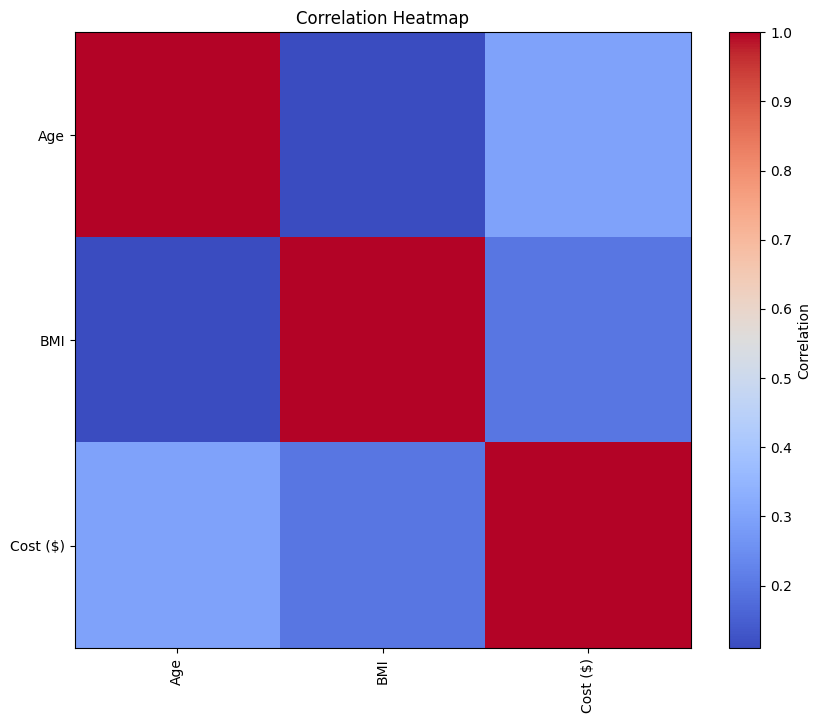

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the dataset
data = pd.read_csv("CA1-Regression-Dataset.csv")

# One-hot encoding for 'Gender', 'Smoker', and 'Region'
data_encoded = pd.get_dummies(data, columns=['Gender', 'Smoker', 'Region'], drop_first=True)

# Display the one-hot encoded dataset
display(data_encoded)

# Select numeric features for correlation analysis
numeric_features = ['Age', 'BMI', 'Cost ($)']

# Calculate correlation matrix
correlation_matrix = data_encoded[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()


Hypothesis: How does each feature compare with every other feature

From the heatmap: We can see that every feature has a weak correlation with every other feature, therefore we can conclude that each feature is independent of the result of the quality.

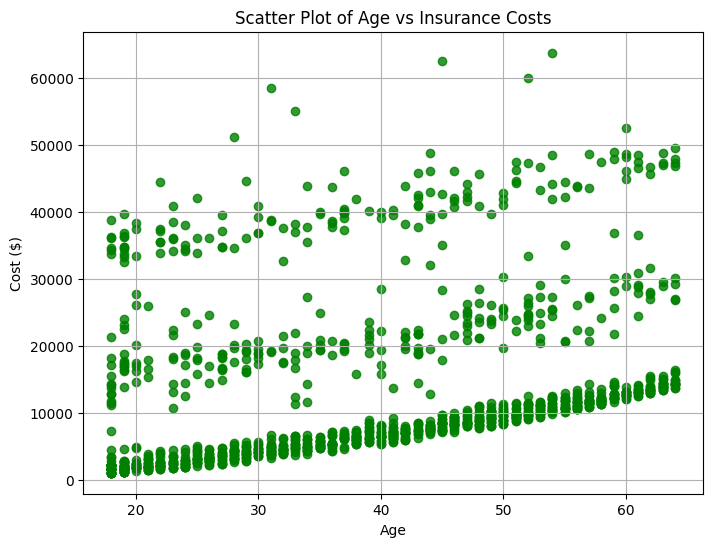

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("CA1-Regression-Dataset.csv")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Cost ($)'], color='green', alpha=0.8)
plt.title('Scatter Plot of Age vs Insurance Costs')
plt.xlabel('Age')
plt.ylabel('Cost ($)')
plt.grid(True)
plt.show()


Does Age Influence Insurance Costs?
Yes, there seems to be a positive relationship as there is a linear increase near the x-axis where the age is positively and linearly related to the insurance cost.

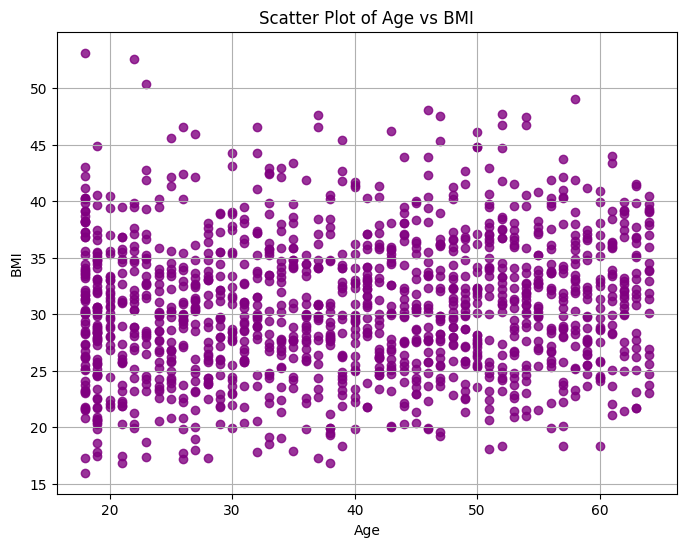

Pearson Correlation Coefficient (r): 0.11


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("CA1-Regression-Dataset.csv")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['BMI'], color='purple', alpha=0.8)
plt.title('Scatter Plot of Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

# Calculate the Pearson correlation coefficient
correlation_coefficient = data['Age'].corr(data['BMI'])

print(f"Pearson Correlation Coefficient (r): {correlation_coefficient:.2f}")

Correlation Between Age and BMI
A Pearson correlation coefficient of 0.11 indicates a relatively weak positive linear correlation between the two variables being compared (in this case, age and BMI). The coefficient ranges from -1 to 1, and a value of 0.11 suggests a positive but not very strong relationship.

<Figure size 1000x600 with 0 Axes>

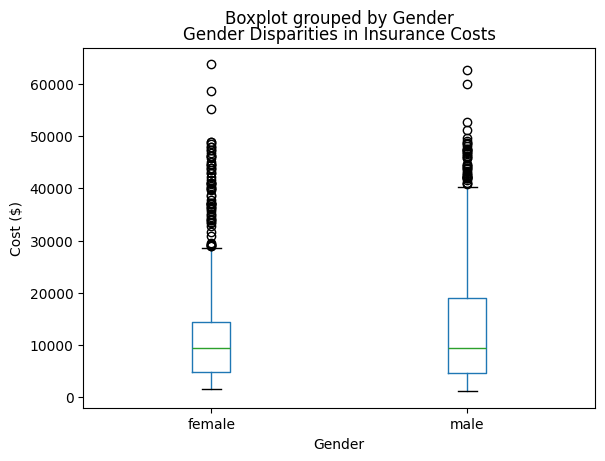

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("CA1-Regression-Dataset.csv")

# Box plot for Gender disparities in insurance costs
plt.figure(figsize=(10, 6))
data.boxplot(column='Cost ($)', by='Gender', grid=False)
plt.title('Gender Disparities in Insurance Costs')
plt.xlabel('Gender')
plt.ylabel('Cost ($)')
plt.show()

Gender Disparities in Hospital Costs
From the box plots, we can clearly see that the range and standard deviation of males is more spread out than females, and also a higher cost. We can see that males are more likely to have a higher hospital cost than females.

<Figure size 800x600 with 0 Axes>

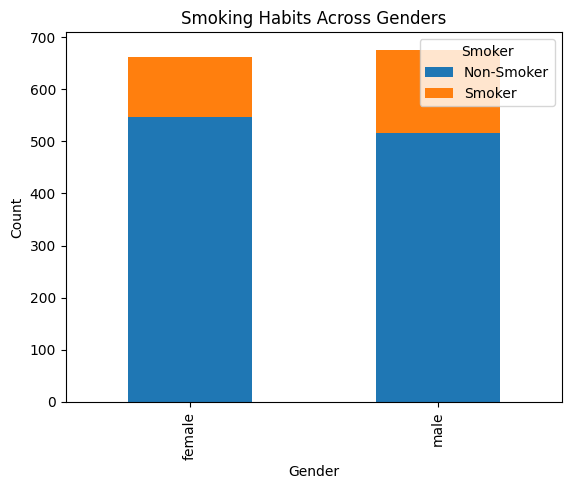

In [18]:
# Count plot for smoking habits across genders
plt.figure(figsize=(8, 6))
data.groupby(['Gender', 'Smoker']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Smoking Habits Across Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()


From the bar graphs, we can see that there is a higher proportion of men that smoke comapred to female which can be linked to why males have a higher hospital cost than comapred to females in the previous visualisation.

2.Building 4 ML models and getting accuracy

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Read the dataset
data = pd.read_csv("CA1-Regression-Dataset.csv")

# One-hot encoding for 'Gender', 'Smoker', and 'Region'
data_encoded = pd.get_dummies(data, columns=['Gender', 'Smoker', 'Region'], drop_first=True)

# Define X and y
X = data_encoded.drop('Cost ($)', axis=1)
y = data_encoded['Cost ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the models
models = {
    'Linear Regression': (linear_model, y_pred_linear),
    'Random Forest': (rf_model, y_pred_rf),
    'Support Vector Regression': (svr_model, y_pred_svr)
}

for model_name, (model, y_pred) in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')


Linear Regression - Mean Squared Error: 34378738.93, R-squared: 0.78
Random Forest - Mean Squared Error: 23885232.25, R-squared: 0.85
Support Vector Regression - Mean Squared Error: 166172974.55, R-squared: -0.07


Random Forest Regression:
Mean Squared Error: 23,885,232.25
R-squared: 0.85
These metrics suggest that the Random Forest Regression model has the lowest mean squared error (indicating better predictive performance) and a higher R-squared value (indicating a better fit to the data) compared to the other models.

Linear Regression:

Mean Squared Error: 34,378,738.93
R-squared: 0.78
Support Vector Regression (SVR):

Mean Squared Error: 166,172,974.55
R-squared: -0.07

Feature selection for Random Forest Regression

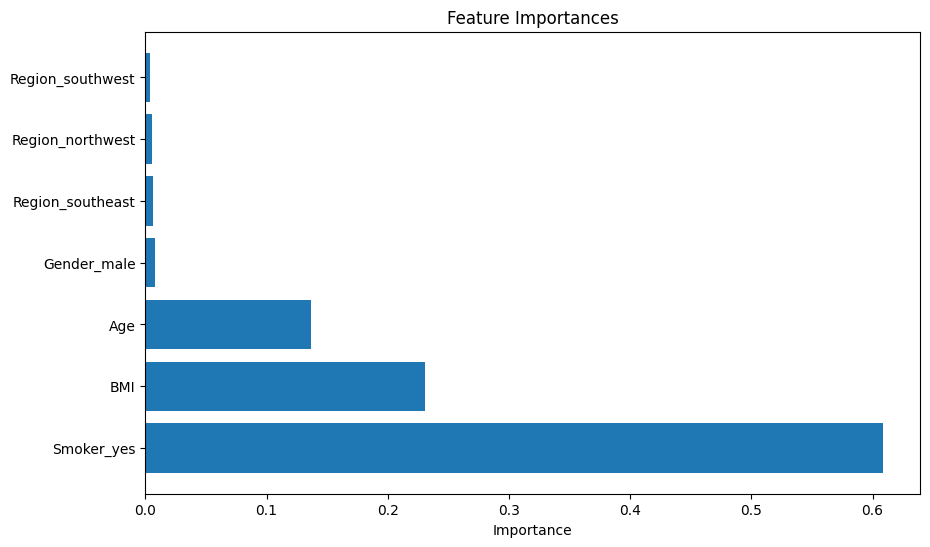

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("CA1-Regression-Dataset.csv")

# One-hot encoding for 'Gender', 'Smoker', and 'Region'
data_encoded = pd.get_dummies(data, columns=['Gender', 'Smoker', 'Region'], drop_first=True)

# Define X and y
X = data_encoded.drop(['ID', 'Cost ($)'], axis=1)  # Adjust features as needed
y = data_encoded['Cost ($)']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

From the graph, we can see that region and gender are both very low importance and can be dropped to improve the models performance

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Read the dataset
data = pd.read_csv("CA1-Regression-Dataset.csv")

# One-hot encoding for 'Gender', 'Smoker', and 'Region'
data_encoded = pd.get_dummies(data, columns=['Gender', 'Smoker'], drop_first=True)

display(data_encoded)

# Assuming you have a DataFrame named 'data' with features and target variable
X = data_encoded.drop(['Cost ($)', 'Region'], axis=1)  # Adjust features as needed
y = data_encoded['Cost ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Calculate Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error: {rf_mse:.2f}')

,ID,Age,BMI,Region,Cost ($),Gender_male,Smoker_yes
0,1,19,27.900,southwest,16884.92400,False,True
1,2,18,33.770,southeast,1725.55230,True,False
2,3,28,33.000,southeast,4449.46200,True,False
3,4,33,22.705,northwest,21984.47061,True,False
4,5,32,28.880,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...
1333,1334,50,30.970,northwest,10600.54830,True,False
1334,1335,18,31.920,northeast,2205.98080,False,False
1335,1336,18,36.850,southeast,1629.83350,False,False
1336,1337,21,25.800,southwest,2007.94500,False,False


Random Forest Mean Squared Error: 25097532.54


Before: Mean Squared Error: 23,885,232.25
After: 25097532.54
The MSE increased, suggesting that the model performance became worse, but at the expense of other variables, which might have improved.

4.2 Tuning hyper parameter using GrindSearchCV for Gradient boosting

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Read the dataset
data = pd.read_csv("CA1-Regression-Dataset.csv")

# One-hot encoding for 'Gender', 'Smoker'
data_encoded = pd.get_dummies(data, columns=['Gender', 'Smoker'], drop_first=True)

# Assuming you have a DataFrame named 'data' with features and target variable
X = data_encoded.drop(['Cost ($)', 'Region'], axis=1)  # Adjust features as needed
y = data_encoded['Cost ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Define reduced hyperparameters space
hyperparameter_space = {
    'n_estimators': [50, 100],
    'max_depth': [None, 3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Define grid search
grid = GridSearchCV(estimator=model, param_grid=hyperparameter_space, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print('The best hyperparameters:', grid.best_params_)

# Evaluate the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Mean Squared Error: {mse:.2f}')

The best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Mean Squared Error: 20842199.24


Before: 23,885,232.25
After feature selection: 25097532.54
After tuning: 20842199.24

Conclusion

Before Optimization: 23,885,232.25

This likely represents a baseline or initial performance metric (such as Mean Squared Error or another regression metric) for the Random Forest model before any optimization.
After Feature Selection: 25,097,532.54

After feature selection, the performance metric increased. This could happen if the feature selection process resulted in the removal of irrelevant or noisy features, allowing the model to focus on more important ones. However, it's unusual for the metric to increase after feature selection.
After Tuning: 20,842,199.24

After hyperparameter tuning, the performance metric decreased. A decrease in Mean Squared Error is generally a positive sign, as it indicates that the model's predictions are closer to the actual values. Lower Mean Squared Error suggests better predictive accuracy.